# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2025**

### Material inicial: [Comencemos por acá para entender PCA](https://github.com/jorobledo/curso_aprendizaje_automatico/blob/master/practico/clase_2/E4-AA2021_PCA_y_clasificacion.ipynb)

----

# Clase 4: PCA: Ejemplo de juguete con el dataset Iris

En esta notebook, ejemplificaremos el uso del método `PCA` para encontrar los componentes principales  y para reducción de dimensionalidad.

Utilizaremos el conjunto de datos didáctico [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris). Se trata de mediciones sobre la forma de distintos tipos de flores de iris y sus tipos respectivos. Será muy adecuado para visualizar los componentes principales ya que las variables son combinaciones de distintas distribuciones gaussianas.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
from sklearn import datasets

numpy.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

Cargamos nuestro conjunto de datos Iris. La matriz de características tiene 150 filas y 4 columnas. Es decir:

$$X \in \mathbb{R}^{150 \times 4}$$

In [ ]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [ ]:
# To make visualizations more easily, we will construct a DataFrame with the
# matrix of values
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_as_dict = {
      col_name: X[:,col_id] for col_id, col_name in enumerate(columns)
  }
data_as_dict['label'] = y.astype('str')
X_df = pandas.DataFrame(data=data_as_dict)

Primero analizaremos qué significa "proyectar" los datos a una nueva dimensión. La siguiente imagen muestra la proyección $\overrightarrow a_1 = (8, 0)$ del vector $ \overrightarrow a = (8, 5) $ sobre el eje horizontal.

![picture](https://vzahorui.net/assets/images/linear_algebra/vectors_and_cosine.png)


El mismo tipo de operación se realiza sobre los vectores del conjunto de datos. Al visualizar dos columnas con un Scatterplot, cada vector $x_i \in \mathbb{R}^4$ (que corresponde a una fila), se representa sólo como un vector de dos dimensiones. Se puede pensar que cada uno de estos puntos está siendo "proyectado" a una única dimensión para graficar la distribución de cada columna con los stripplots laterales.

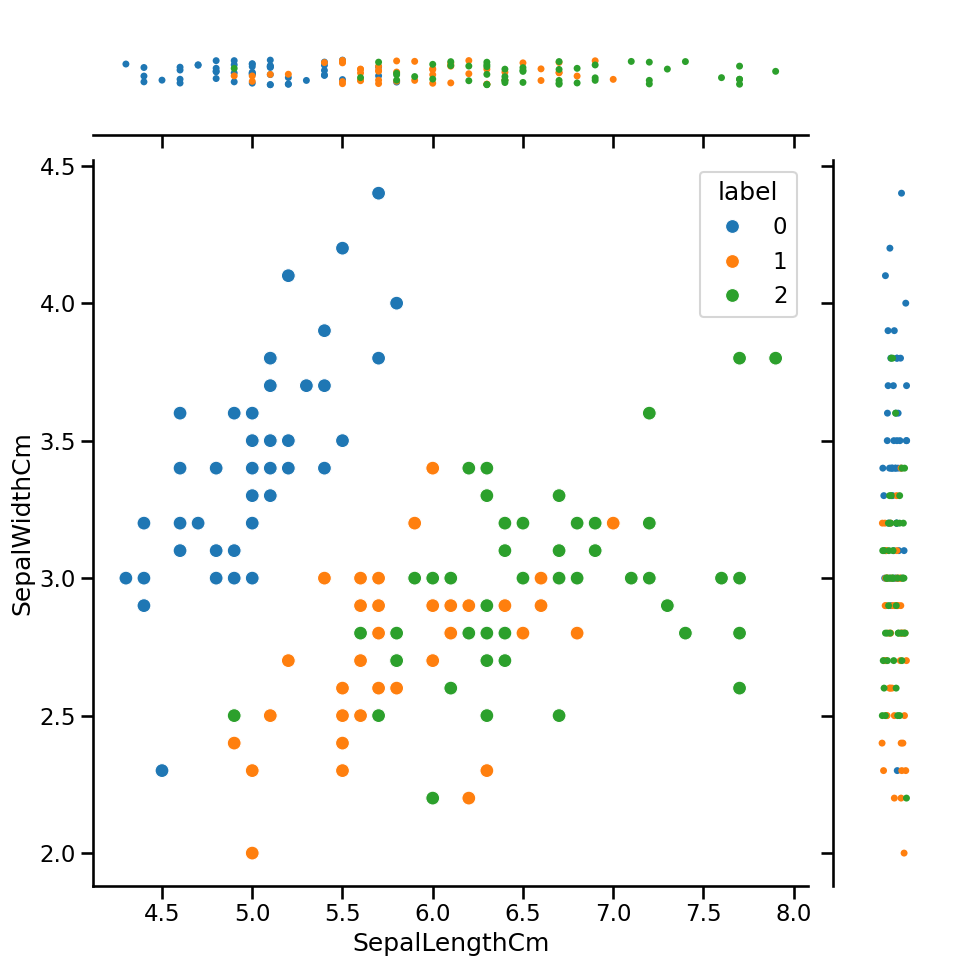

In [ ]:
g = seaborn.JointGrid(data=X_df, x='SepalLengthCm', y='SepalWidthCm',
                      height=10, hue='label')
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

Si se visualizan los datos a través de Scatterplots de 2D, podemos ver cómo se distribuyen conjuntamente cada par de variables. El gráfico `seaborn.pairplot` muestra también la distribución de cada variable por separado utilizando histogramas.

Cada uno de estos gráficos es una *proyección* de la matriz inicial a un número menor de dimensiones. En este caso, se utilizan las mismas dimensiones originales, es decir, las columnas pre-existentes, pero existen otras formas de proyección.




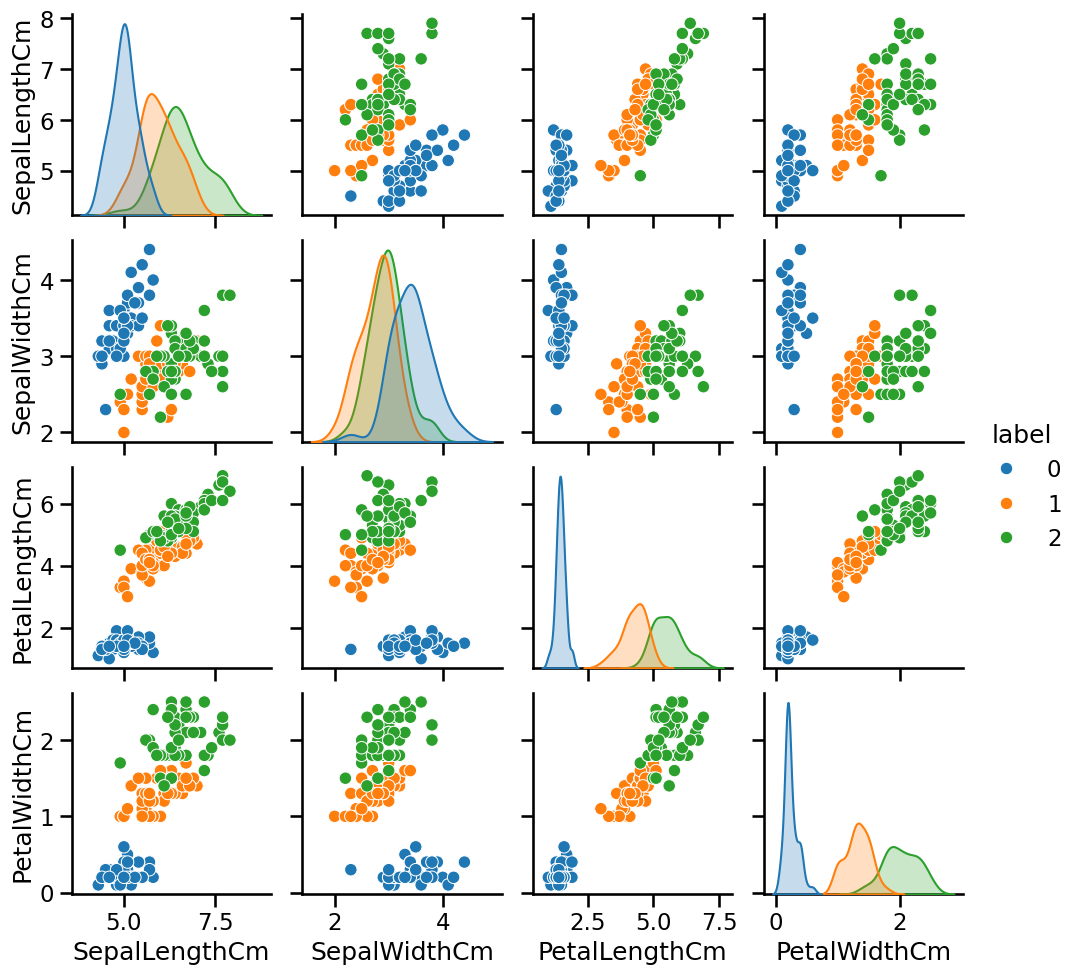

In [ ]:
seaborn.pairplot(data=X_df, hue='label')


# Reducción de dimensionalidad

Para poder realizar un análisis visual, nos limitaremos a trabajar en una única dimensión. Es decir, se busca elegir una única columna.

**Si el objetivo es predecir la columna `label`, ¿qué columna nos ayuda a separar mejor nuestros datos?**



Eliminar todas las columnas permite reducir la dimensionalidad, pero como consecuencia se pierde mucha información. Existen métodos que combinan la información de todas las columnas originales en una única dimensión. Uno de ellos es Principal Component Analysis o **PCA**.

El PCA es un método algebraico que nos permite calcular los componentes principales de una matriz. Los componentes principales son *direcciones* en el espacio de nuestros datos $R^{4}$ (más específicamente son combinaciones lineales de los datos). Estos componentes o direcciones se calculan de forma tal que:
* Son ortogonales, es decir, no están correlacionadas.
* Están ordenados de acuerdo al nivel de varianza de los datos originales que representan.

Usando estos componentes, se puede construir una proyección lineal de nuestros datos a una nueva matriz Z donde cada columna ahora está en la dirección de un componente principal. Luego, se selecciona un subconjunto de las primeras $d$ columnas para formar la matriz $Z$. Por las propiedades de los componentes principales, sabemos que hemos perdido la menor cantidad de varianza de nuestros datos.





Utilizaremos la [clase PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implementada en la librería scikit-learn. El método `fit` computa los componentes principales de la matriz original, que luego podemos acceder a través de los atributos de la instancia `pca`.


### Ejemplo 1: Proyección de $R^2$ en $R^2$

Con el propósito de visualizar la transformación, utilizaremos sólo dos columnas de la matrix X.

Al entrenar la instancia de la clase `PCA`, sklearn se encarga de centrar los datos restandoles la media. Sin embargo, es recomendable también *estandarizar* o al menos *escalar* la matriz original para asegurar de que todas las variables estén en las mismas unidades y ninguna tenga un peso demasiado grande.

In [ ]:
cols_to_project = ['PetalLengthCm', 'PetalWidthCm']
cols_to_project_ids = [columns.index(col) for col in cols_to_project]

X_standard = ((X - X.mean(axis=0)) / X.std(axis=0))[:,cols_to_project_ids]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_standard)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Explained variance: 
[1.97603902 0.03738379]
Explained variance ratio
[0.98143272 0.01856728]


En el siguiente gráfico se representan los componentes principales. Se observa que son efectivamente las direcciones de mayor variación.


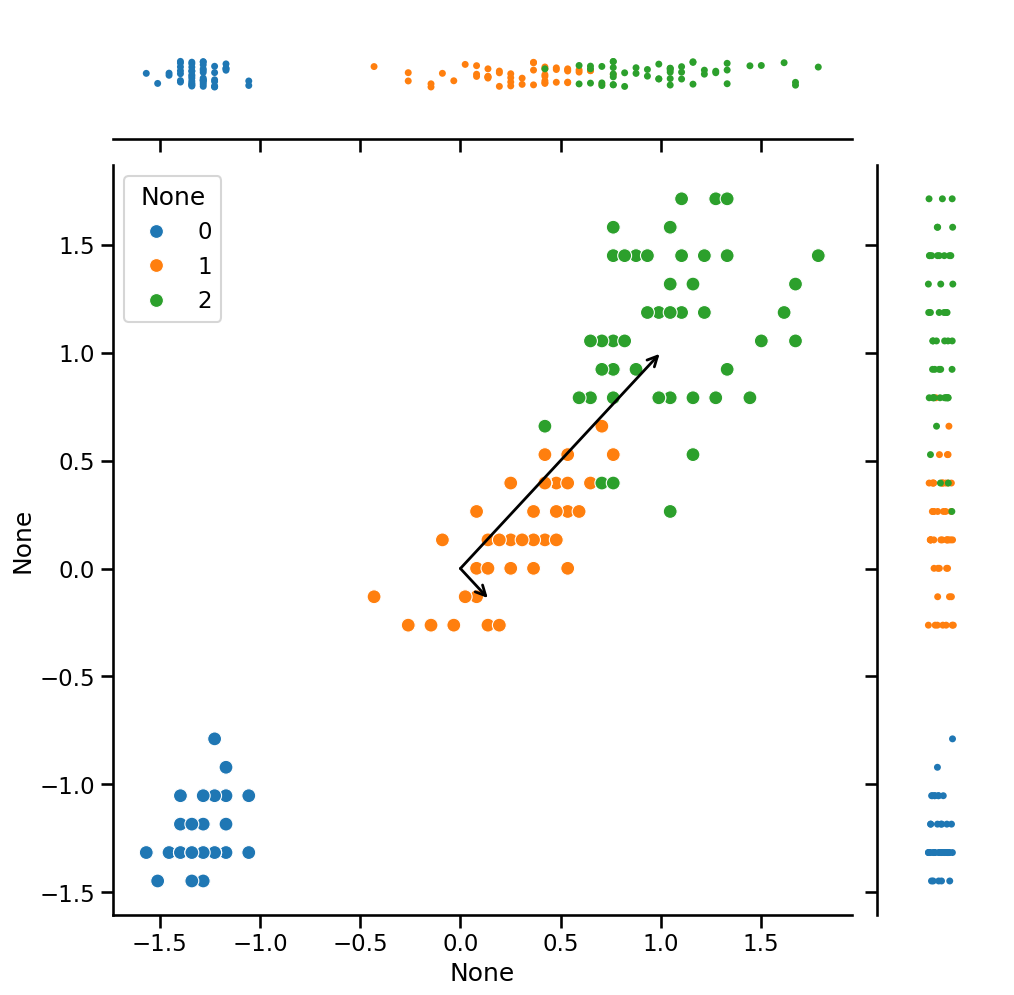

In [ ]:
g = seaborn.JointGrid(x=X_standard[:,0], y=X_standard[:,1],
                      hue=X_df.label.values, height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)
ax = g.ax_joint.figure.axes[0]
for length, vector in zip(pca.explained_variance_, pca.components_):
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    v = vector * numpy.sqrt(length)
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)


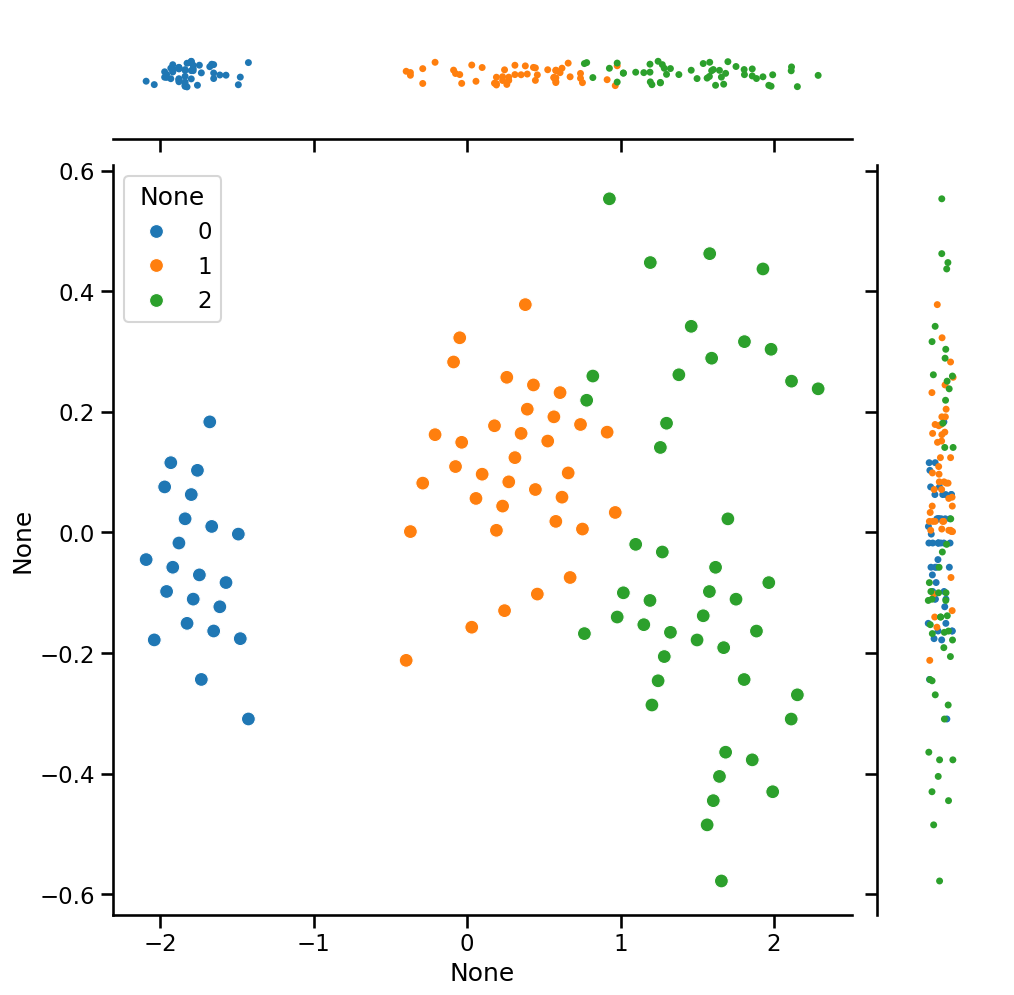

In [ ]:
X_projected = pca.transform(X_standard)

g = seaborn.JointGrid(x=X_projected[:,0], y=X_projected[:,1],
                      hue=X_df.label.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

In [ ]:
centered_data = X - X.mean()

### Ejemplo 2: Proyección de $\mathbb{R}^4$ en $\mathbb{R}^2$

En el ejemplo anterior, sólo mostramos cómo los componentes principales permiten proyecta un conjunto de datos a *otras* dimensiones, pero utilizamos la misma cantidad.

Veamos ahora el resultado de calcular los componentes principales utilizando todas nuestras columnas, y luego cómo podemos proyectar esos datos de $\mathbb{R}^4$ a $\mathbb{R}^2$

In [ ]:
X_standard2 = ((X - X.mean(axis=0)) / X.std(axis=0))

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(X_standard2)
print("Principal components")
print(pca2.components_)
print("Explained variance ratio")
print(pca2.explained_variance_ratio_)

Principal components
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio
[0.72962445 0.22850762]


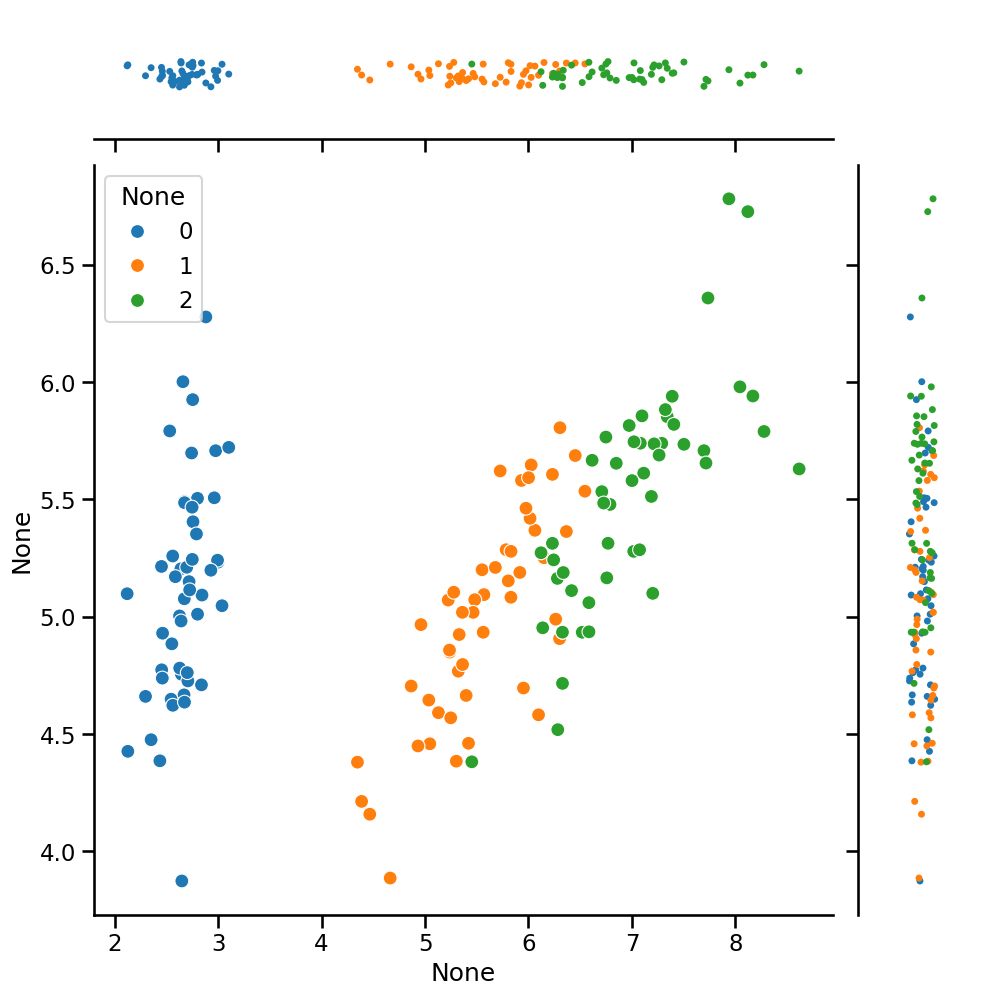

In [ ]:
X_reduced = pca2.transform(X)

g = seaborn.JointGrid(x=X_reduced[:,0], y=X_reduced[:,1],
                      hue=X_df.label.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)